**Introduction :-**
The data set is a colection of 1999 tweets.The Data appears to be in it raw form so processing of the data has to be done before any analysis.

**Objective** :- Classify into Possitive, Negative or Neural Sentiment.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

import warnings
warnings.filterwarnings("ignore")

In [2]:
tweets = pd.read_csv('Elon_musk.csv',on_bad_lines='skip',encoding = 'cp1252')

In [3]:
tweets.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
tweets.tail()

,Unnamed: 0,Text
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,1999,Progress update August 28


In [5]:
tweets.shape

(1999, 2)

In [6]:
tweets.columns

Index(['Unnamed: 0', 'Text'], dtype='object')

In [7]:
tweets.drop('Unnamed: 0',axis = 1,inplace = True)

In [8]:
tweets.head(3)

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!


In [9]:
tweets.tail(3)

,Text
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,Progress update August 28


**Data Exploration:-** The code below processes tweets to extract user mentions in there tweets, creates a bar chart primarily focusing on the top 20 user mentions, and customizes the plot for better readability.

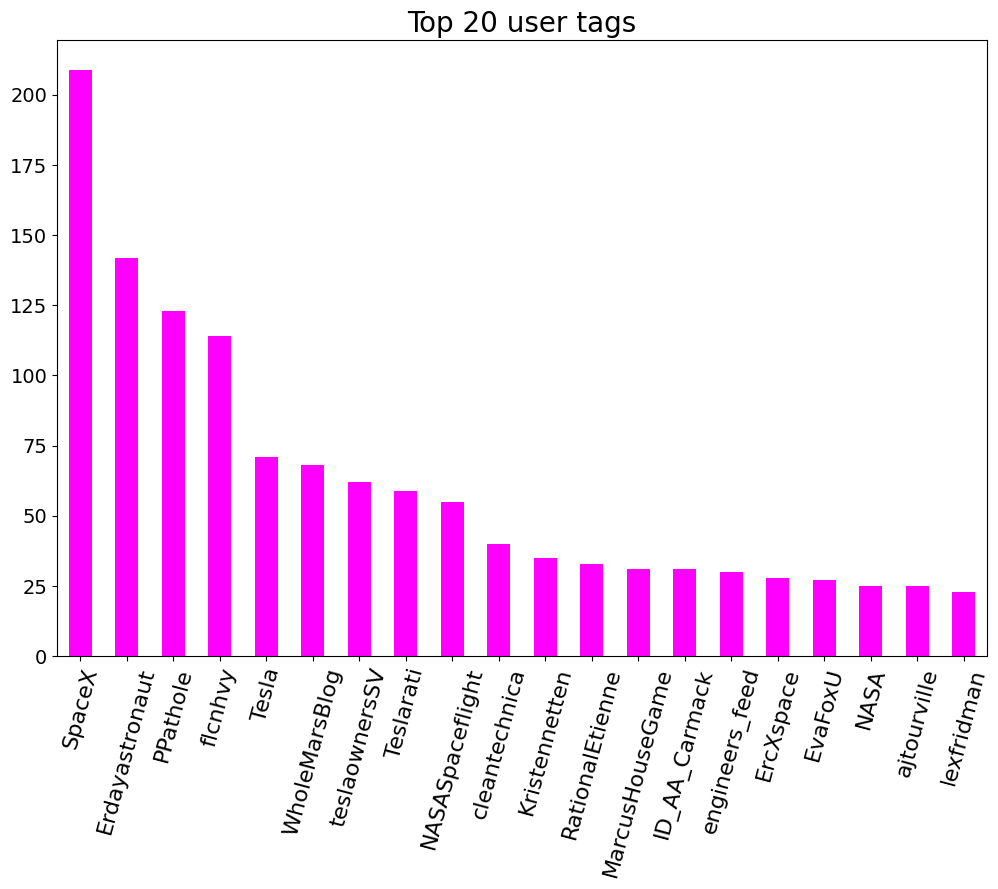

In [10]:
import itertools

c = list(itertools.chain(*tweets.Text.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ")
                                                     if '@' in handle.replace(":", "")]).tolist()))
# converts the datframe to list of users tageed in tweets

pd.Series(c).value_counts().head(20).plot.bar(figsize=(12, 8), fontsize=14, color='magenta')
# First converting the list into series by using the value_counts() method filtering out the top 20 users mentioned in tweets
# Then plotting it

plt.gca().set_title('Top 20 user tags', fontsize=20) # Title of the plot
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=75, ha='center', fontsize=16) # Adusting the ' xtick lables ' for display
plt.show()

In [11]:
c[:3]

['kunalb11', 'ID_AA_Carmack', 'joerogan']

Cleaning the Tweets before the further processing

In [12]:
def clean_tweet_text(text):
  text = text.lower() # brings every charcter in tweet to the lower case
  text = re.sub('\[.*?\]','',text) # to remove square brackets and everything between them in the text
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # to remove any punchuation charaters from the string (eg.. @,... etc.)
  text = re.sub('\w*\d\w*','',text) # it removes any word in the text that contains at least one digit. e.g. 10pm
  text = re.sub("[0-9" "]+"," ",text) # replaces sequences of digits with a single space
  text = re.sub('[‘’“”…]', '', text) #  removes specific types of quotation marks (‘’, ‘’, “”, ”) and an ellipsis (…) from the text.
  return text

In [13]:
tweets['Text'] = tweets['Text'].apply(clean_tweet_text)
tweets.head()

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...


**Word Frequency** :- Let's check top 25 frequently appearing words in tweets

In [14]:
frequent_words = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:25]
frequent_words

the               487
to                400
a                 356
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                138
we                136
on                129
that              128
rt                127
but               126
ppathole          123
i                 117
flcnhvy           114
with              108
are               100
dtype: int64

**Removal of Stop Words** :- It can be seen that most frequenty appearing words are the stop words hence we remove stop words

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) # storing the english stop words in a set so that it's removal is faster
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

**Word Frequency** :-  After removal of stop words

In [17]:
frequent_words = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:25]
frequent_words

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
nasaspaceflight     55
haha                55
good                51
launch              49
sure                43
yeah                41
cleantechnica       40
would               40
much                40
first               39
one                 39
like                38
true                35
dtype: int64

**Basic Feature Extraction :-**
Count Vectorizer to determine the frequency of words

The following code is **using CountVectorizer** to
 transform text data into a document-term matrix
, and then it creates a DataFrame to analyze the word frequencies and display the top 11 terms.


**The output shows the terms, the number of occurrences, and their frequencies in the given text data.**

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(tweets["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.head(11)

,term,occurrences,frequency
0,aber,1,0.000076
1,able,6,0.000453
2,abo,1,0.000076
3,aboard,1,0.000076
4,abort,3,0.000227
5,absence,1,0.000076
6,absolute,1,0.000076
7,absolutely,15,0.001133
8,absorb,1,0.000076
9,absorption,1,0.000076


**TFIDF :-**
Determination of the Trem Frequency and Inverse Document Frequency

The code is using **TfidfVectorizer to transform text data into a TF-IDF weighted document-term matrix**, and then it creates a DataFrame to analyze and display the TF-IDF values for the top 1000 features in the given text data.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(tweets["Text"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df

,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yeah,year,years,yes,yesterdays,youre,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.356742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


N-grams :-
+ Bi-Gram and
+ Tri-Gram

The provided function, **get_top_n2_words**, is **designed to extract the top-n bigrams** (two-word combinations) from a given corpus.

In [20]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [21]:
top2_words = get_top_n2_words(tweets["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df.head(11)

,Bi-gram,Freq
0,rt spacex,71
1,spacex falcon,17
2,erdayastronaut spacex,16
3,pretty much,12
4,rt nasa,12
5,waemd spacex,11
6,giga berlin,10
7,first stage,10
8,teslaratiteam teslarati,10
9,nasa spacex,9


**Bi-Gram Plot for Top 20 bigrams**

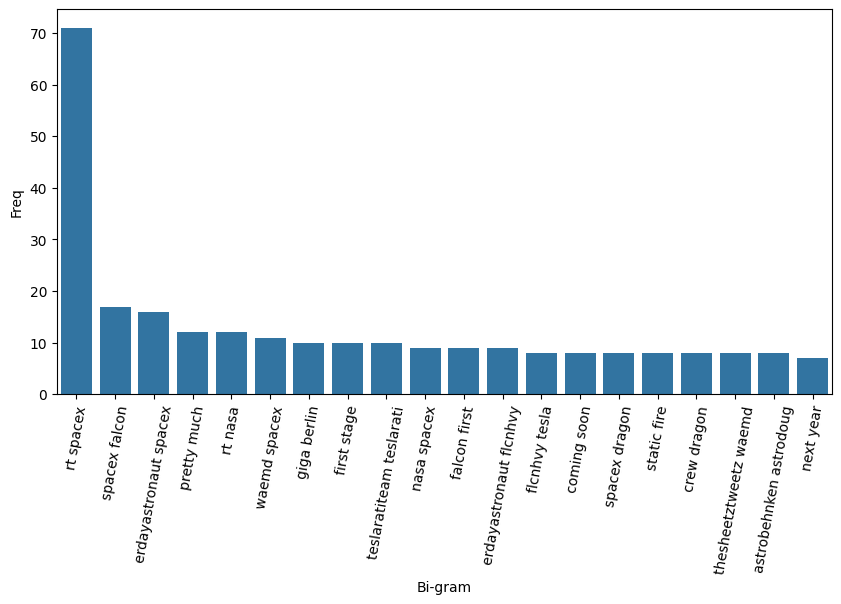

In [27]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=80,labels = top20_bigram["Bi-gram"]);

**Tri-Gram**

In [23]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [24]:
top3_words = get_top_n3_words(tweets["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
top3_df.head(11)

,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7
5,ppathole thesheetztweetz waemd,7
6,waemd spacex spacexstarlink,7
7,first stage landed,6
8,rt spacex liftoff,6
9,spacex spacexstarlink wanationalguard,6


**Tri-Gram Plot for Top 20 Trigrams**

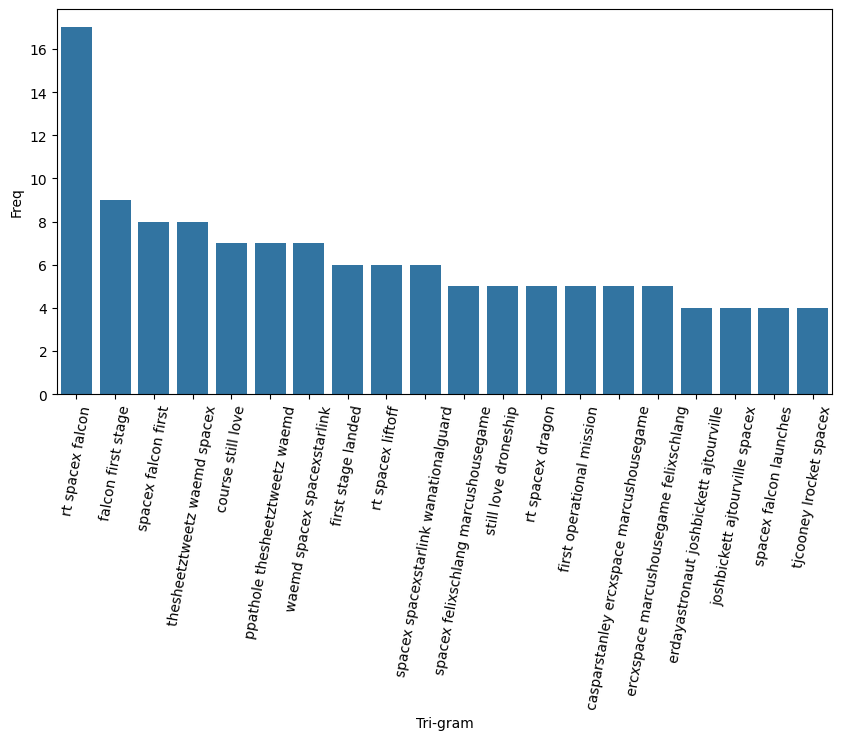

In [26]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=80,labels = top20_trigram["Tri-gram"]);

**Creating Word-Cloud**

In [30]:
full_tweet_string = " ".join(tweets['Text'])
print(len(full_tweet_string),type(full_tweet_string))

105252 <class 'str'>


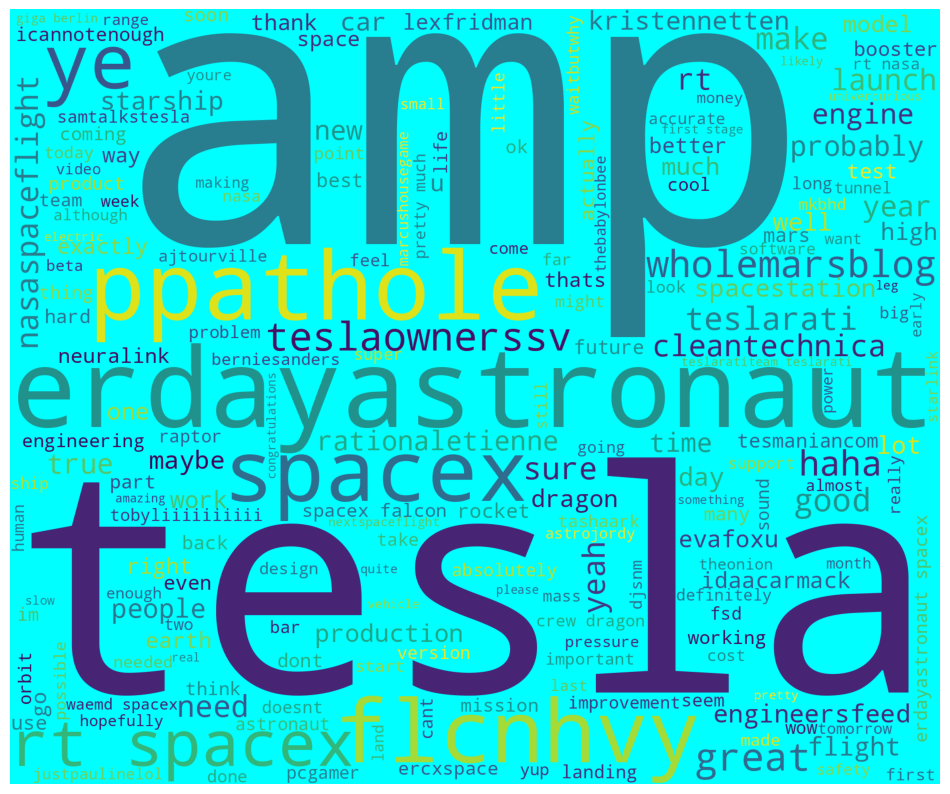

In [38]:
#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(12,12),dpi=100)
wordcloud_stw = WordCloud(background_color= 'cyan', width = 1800, height = 1500).generate(full_tweet_string)
plt.axis('off')
plt.imshow(wordcloud_stw)
plt.show()

In [32]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
tweets[["subjectivity", "polarity"]] = tweets.apply(sentiment_analysis, axis=1)
tweets.head(11)

,Text,subjectivity,polarity
0,im alien,0.750000,-0.250000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000
2,joerogan spotify great interview,0.750000,0.800000
3,doge underestimated,0.000000,0.000000
4,teslacn congratulations tesla china amazing ex...,0.322222,0.200000
5,happy new year ox,0.727273,0.468182
6,frodo underdoge thought would fail httpstcozgx...,0.300000,-0.500000
7,owensparks flcnhvy haha thanks,0.250000,0.200000
8,flcnhvy indeed tweets definitely represent rea...,0.500000,0.000000
9,entertaining outcome likely,0.850000,0.250000


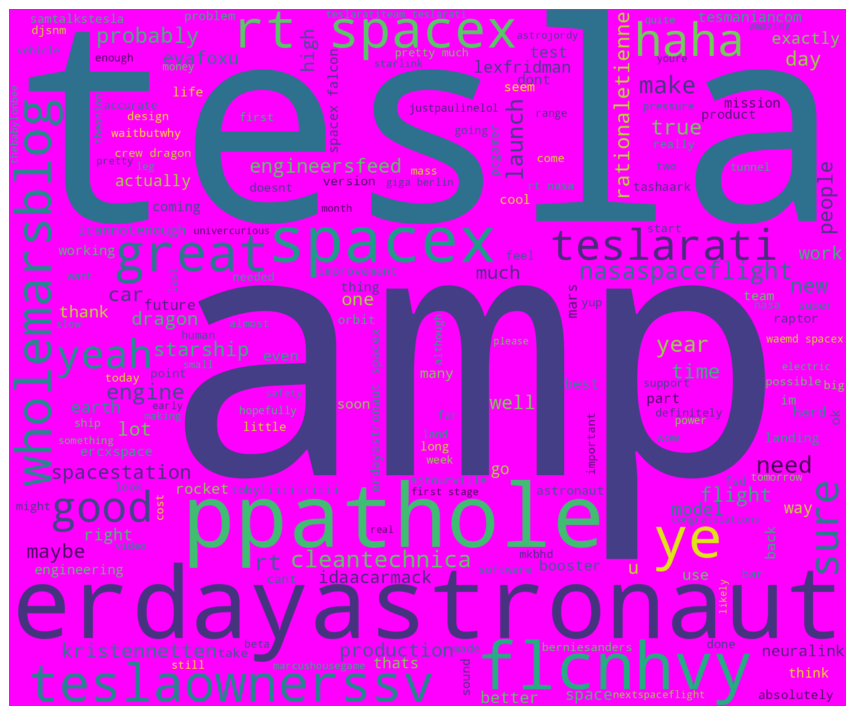

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in tweets["Text"]])
wordCloud = WordCloud(background_color= 'magenta',width = 1800, height = 1500, random_state = 21).generate(allwords)
plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

**Sentiment Intensity Analysis of the Tweets**

In [43]:
  import nltk
  nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [46]:
# Importing the required libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

# Define the functions
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

def analysis(score):
    if score == 'neg':
        return "Negative"
    elif score == 'pos':
        return "Positive"
    else:
        return "Neutral"

tweets["polarity_SIA"] = tweets["Text"].apply(fetch_sentiment_using_SIA)
tweets["polarity_textblob"] = tweets["Text"].apply(fetch_sentiment_using_textblob)

# Combine sentiments from both methods
tweets["combined_sentiment"] = tweets[["polarity_SIA", "polarity_textblob"]].mode(axis=1).iloc[:, 0]

# Apply the 'analysis' function to create a new column
tweets["analysis"] = tweets["combined_sentiment"].apply(analysis)


In [47]:
tweets.head()

,Text,subjectivity,polarity,polarity_SIA,polarity_textblob,combined_sentiment,analysis
0,im alien,0.750000,-0.25,pos,neg,neg,Negative
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.00,pos,pos,pos,Positive
2,joerogan spotify great interview,0.750000,0.80,pos,pos,pos,Positive
3,doge underestimated,0.000000,0.00,neg,pos,neg,Negative
4,teslacn congratulations tesla china amazing ex...,0.322222,0.20,pos,pos,pos,Positive


In [50]:
possitive_tweets = tweets[tweets['analysis'] == 'Positive']
negative_tweets = tweets[tweets['analysis'] == 'Negative']
neutral_tweets = tweets[tweets['analysis'] == 'Neutral']

# Printing First 5 Possitive Tweets
print('positive tweets')
for i, row in possitive_tweets[:5].iterrows():
    print(' - ' + row['Text'])

# Printing First 5 Negative Tweets
print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
    print(' - ' + row['Text'])

# Printing First 5 Neutral Tweets
print('Neutral tweets')
for i, row in neutral_tweets[:5].iterrows():
    print(' - ' + row['Text'])

positive tweets
 - idaacarmack ray tracing cyberpunk hdr nextlevel tried
 - joerogan spotify great interview
 - teslacn congratulations tesla china amazing execution last year next even
 - happy new year ox
 - owensparks flcnhvy haha thanks
negative tweets
 - im alien
 - doge underestimated
 - frodo underdoge thought would fail httpstcozgxjfdzzrm
 - freewalletorg crypto wallet wont give private keys avoided costs
 - freewalletorg app sucks
Neutral tweets


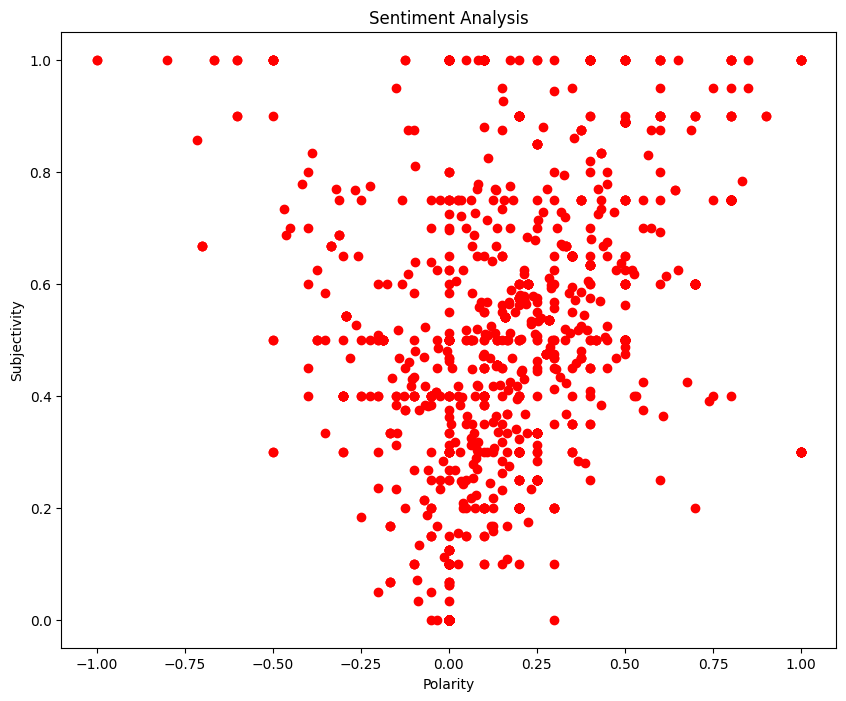

In [51]:
plt.figure(figsize=(10, 8))

for i in range(0, tweets.shape[0]):
    plt.scatter(tweets["polarity"][i], tweets["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [53]:
(len(possitive_tweets) / len(negative_tweets))*100

544.8387096774194

As it can be seen that the number possitive tweets is quite High as compared to that of negative tweets. In general we can say within the Data Set considered for analysis.

There is **Possitive Sentiments for Elon_musk Products among the Tweets**